1.Import libraries

In [25]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

2.Load dataset and preview

In [26]:
# Load the penguins dataset
df = sns.load_dataset("penguins")

# Show first 5 rows
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [27]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [28]:
df.shape

(344, 7)

3.Check dataset info (missing values, columns, datatypes)

In [29]:
# Basic info about dataset
df.info()

# Count missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


4.Drop missing values

In [30]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirm no missing values left
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


5.Filter only Adelie and Chinstrap

In [31]:
# Filter rows for 'Adelie' and 'Chinstrap'
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Check unique species
df_filtered['species'].value_counts()

,count
species,
Adelie,146
Chinstrap,68


6.Encode target labels

In [32]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode the species column (Adelie = 0, Chinstrap = 1)
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display mapping result
df_filtered[['species', 'class_encoded']].head()

,species,class_encoded
0,Adelie,0
1,Adelie,0
2,Adelie,0
4,Adelie,0
5,Adelie,0


7.Define features (X) and target (y)

In [33]:
# Target variable
y = df_filtered['class_encoded']

# Features (drop encoded target)
X = df_filtered.drop(['class_encoded'], axis=1)

# Show first 5 rows of features
X.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [35]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [36]:
# One-hot encode categorical features and drop first dummy
X_encoded = pd.get_dummies(X, drop_first=True)

# Show first 5 rows
X_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,False,False,True,True
1,39.5,17.4,186.0,3800.0,False,False,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,True


In [37]:
# Convert True/False to 1/0
X_encoded = X_encoded.astype(int)

# Check the first few rows
X_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,island_Dream,island_Torgersen,sex_Male
0,39,18,181,3750,0,0,1,1
1,39,17,186,3800,0,0,1,0
2,40,18,195,3250,0,0,1,0
4,36,19,193,3450,0,0,1,0
5,39,20,190,3650,0,0,1,1


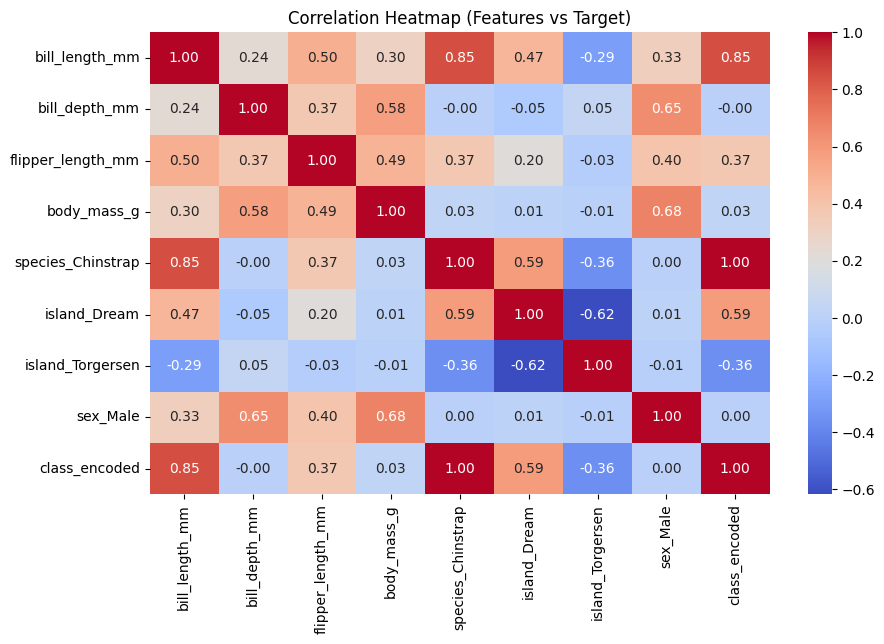

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation heatmap including the target
plt.figure(figsize=(10, 6))
sns.heatmap(X_encoded.join(y).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Features vs Target)")
plt.show()

8.Train-test split

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (171, 8)
Testing data shape: (43, 8)


9.Initialize Logistic Regression (saga solver)

In [41]:
# Initialize Logistic Regression with saga solver
logreg = LogisticRegression(solver="saga", max_iter=5000)  # max_iter added to ensure convergence

10.Train the model

In [42]:
# Fit the model on training data
logreg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=5000, solver='saga')

11.Make predictions

In [43]:
# Predict on the test data
y_pred = logreg.predict(X_test)

# Show first 10 predictions vs actual labels
pd.DataFrame({"Actual": y_test[:10].values, "Predicted": y_pred[:10]})

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


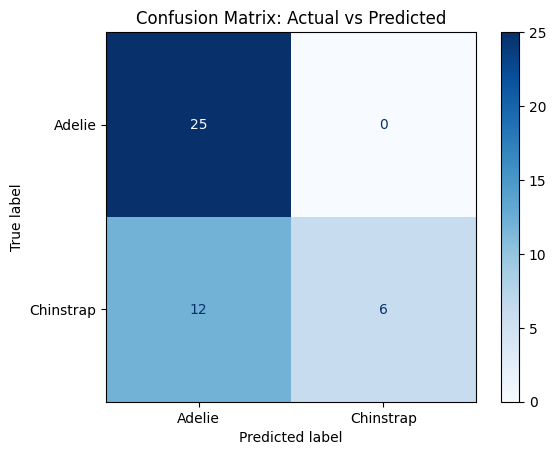

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)  # optional: show species names
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Actual vs Predicted")
plt.show()

12.Evaluate model

In [52]:
from sklearn.metrics import accuracy_score

# Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred))

# Coefficients + Intercept
coef_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(X_encoded.columns),
    'Coefficient': [logreg.intercept_[0]] + list(logreg.coef_[0])
})
print("Model Coefficients & Intercept:\n", coef_df)

Classification Accuracy: 0.7209302325581395
Model Coefficients & Intercept:
              Feature  Coefficient
0          Intercept    -0.000573
1     bill_length_mm     0.110646
2      bill_depth_mm    -0.007602
3  flipper_length_mm    -0.011556
4        body_mass_g    -0.000848
5  species_Chinstrap     0.013413
6       island_Dream     0.008106
7   island_Torgersen    -0.004695
8           sex_Male     0.000606


13.Train Logistic Regression with liblinear Solver

In [53]:
# Train with liblinear solver
logreg_lib = LogisticRegression(solver='liblinear', max_iter=5000)
logreg_lib.fit(X_train, y_train)

# Predict & evaluate
y_pred_lib = logreg_lib.predict(X_test)
accuracy_lib = accuracy_score(y_test, y_pred_lib)
print("Classification Accuracy (liblinear):", round(accuracy_lib,4))

Classification Accuracy (liblinear): 1.0


Check overfitting or not

In [54]:
train_acc = logreg_lib.score(X_train, y_train)
test_acc = logreg_lib.score(X_test, y_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 1.0
Test Accuracy: 1.0


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Train with saga solver on scaled data
logreg_saga_scaled = LogisticRegression(solver='saga', max_iter=5000)
logreg_saga_scaled.fit(X_train_scaled, y_train)
accuracy_saga_scaled = accuracy_score(y_test, logreg_saga_scaled.predict(X_test_scaled))
print("Saga Solver Accuracy (scaled):", round(accuracy_saga_scaled, 4))

Saga Solver Accuracy (scaled): 1.0


In [58]:
# Train with liblinear solver on scaled data
logreg_lib_scaled = LogisticRegression(solver='liblinear', max_iter=5000)
logreg_lib_scaled.fit(X_train_scaled, y_train)
accuracy_lib_scaled = accuracy_score(y_test, logreg_lib_scaled.predict(X_test_scaled))
print("Liblinear Solver Accuracy (scaled):", round(accuracy_lib_scaled, 4))

Liblinear Solver Accuracy (scaled): 1.0
